In [1]:
import sys
import os
sys.path.append('/home/franzi/anzeigendaten/python_base/skillextraktion/fh_ma')
sys.path.append('/home/franzi/anzeigendaten/EnvPython')
import prepare_training_data
from labels import *
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

start = time.time()
x_train, y_train, x_test, y_test, test_afks, features = prepare_training_data.get_training_data(noSkill=True)
print('took: ',time.time()-start)

20861874
0
skipgram, punctuation_marks, stoppwords, multiword, lower_case, vector_dim True False False False False 100
init /home/franzi/Documents/models/no_pm_no_sw_vecDim100/skip_gram_model.model
loading existing w2v model from  /home/franzi/Documents/models/no_pm_no_sw_vecDim100/skip_gram_model.model
using data from  /home/franzi/Documents/data/data_noSkill_4_vecDim100
loading data...
37823 37823 12053 12053 0 0
took:  3.5316412448883057


In [ ]:
y_label = prepare_training_data.one_hot_to_labels(y_test)

In [ ]:
import numpy as np
label_y = prepare_training_data.one_hot_to_labels(y_train)

In [5]:
from tensorflow.keras import *

In [6]:
# Build the model
print('Build model...')
model = Sequential()
model.add(layers.LSTM(256, return_sequences=True, input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(512, return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(256, return_sequences=True))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(256))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256))
model.add(layers.Dense(256))
model.add(layers.Dense(units=2))
model.add(layers.Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


model.evaluate(x=x_test, y=y_test)

batch_size=32
history = model.fit(x_train, y_train, batch_size=batch_size, shuffle=True, epochs=3, validation_data=(x_test, y_test))

2020-08-12 14:59:25 WARNING: From /home/franzi/.local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Build model...
12053/12053 [==============================] - 25s 2ms/sample - loss: 0.6932 - acc: 0.4999
Train on 37823 samples, validate on 12053 samples


2020-08-12 14:59:54 WARNING: From /home/franzi/.local/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
37823/37823 [==============================] - 317s 8ms/sample - loss: 0.4881 - acc: 0.7559 - val_loss: 0.3551 - val_acc: 0.8533
Epoch 2/3
37823/37823 [==============================] - 307s 8ms/sample - loss: 0.3032 - acc: 0.8773 - val_loss: 0.2619 - val_acc: 0.8962
Epoch 3/3
37823/37823 [==============================] - 315s 8ms/sample - loss: 0.2592 - acc: 0.8984 - val_loss: 0.2525 - val_acc: 0.9036


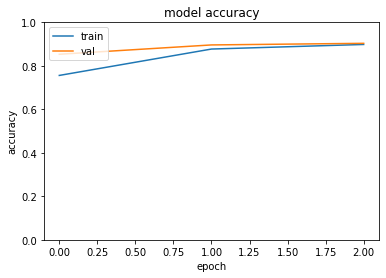

In [7]:
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.ylim(0,1)
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [8]:

# predict test data
y_pred = model.predict(x_test)

In [ ]:
import numpy as np
# convert one hot to labels for test data
pred_label = prepare_training_data.one_hot_to_labels(y_pred)
true_label = prepare_training_data.one_hot_to_labels(y_test)

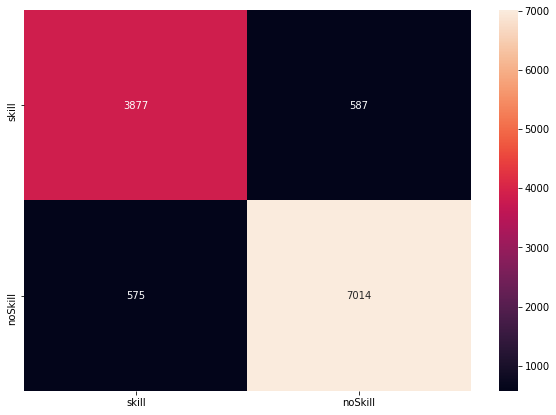

In [10]:
# Create Confusion Matrix

import sklearn
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

labelsi = list(labels)

cm = sklearn.metrics.confusion_matrix(true_label, pred_label)
df_cm = pd.DataFrame(cm, ['skill', 'noSkill'],columns = ['skill', 'noSkill'])
plt.figure(figsize = (10,7))
plt.ylabel('Eingabe')
plt.xlabel('Ausgabe')
sn.heatmap(df_cm, annot=True,fmt='g')

In [11]:
# Calc metrics for test data
import sklearn
from sklearn.metrics import precision_score, recall_score
from tabulate import tabulate

headers = [' '] + ['skill', 'noSkill']

table=[['precision'] + list(precision_score(true_label, pred_label, average=None)), 
       ['recall']+list(recall_score(true_label, pred_label, average=None)), 
       ['f1']+ list(sklearn.metrics.f1_score(true_label, pred_label, average=None))]

print(tabulate(table, headers=headers, tablefmt='orgtbl'))
f1 = sklearn.metrics.f1_score(true_label, pred_label, average=None)
print('f1 average: ',sum(sklearn.metrics.f1_score(true_label, pred_label, average=None))/len(list(precision_score(true_label, pred_label, average=None))))
print('acc', sklearn.metrics.accuracy_score(true_label, pred_label))

|           |    skill |   noSkill |
|-----------+----------+-----------|
| precision | 0.870845 |  0.922773 |
| recall    | 0.868504 |  0.924232 |
| f1        | 0.869672 |  0.923502 |
f1 average:  0.8965874015129431
acc 0.9035924666058243
